In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/demographics.csv')
df

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim
0,39,True,23.2,91,True,0,False,1121.87
1,24,True,30.1,87,False,0,False,1131.51
2,19,True,41.1,100,False,0,False,1146.80
3,20,True,43.0,86,False,0,False,1149.40
4,30,True,53.1,97,False,0,False,1163.46
...,...,...,...,...,...,...,...,...
1327,44,False,35.5,88,True,0,True,55135.40
1328,59,False,38.1,120,False,1,True,58571.07
1329,30,True,34.5,91,True,3,True,60021.40
1330,37,True,30.4,106,False,0,True,62592.87


<Axes: xlabel='age', ylabel='claim'>

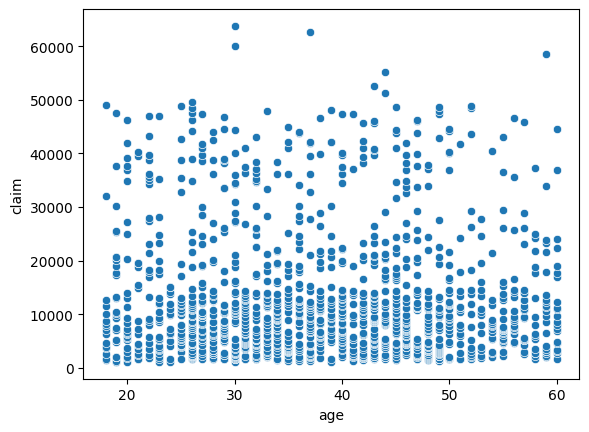

In [3]:
import seaborn as sns
sns.scatterplot(x=df['age'], y=df['claim'])

<Axes: xlabel='bmi', ylabel='claim'>

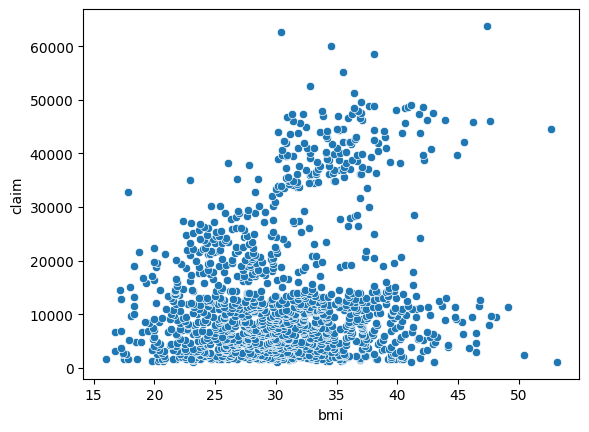

In [4]:
sns.scatterplot(x=df['bmi'], y=df['claim'])

<Axes: xlabel='bmi', ylabel='bloodpressure'>

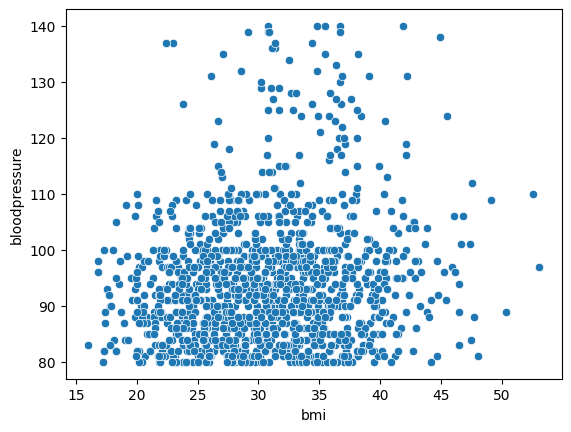

In [5]:
sns.scatterplot(x=df['bmi'], y=df['bloodpressure'])

<Axes: xlabel='claim', ylabel='bloodpressure'>

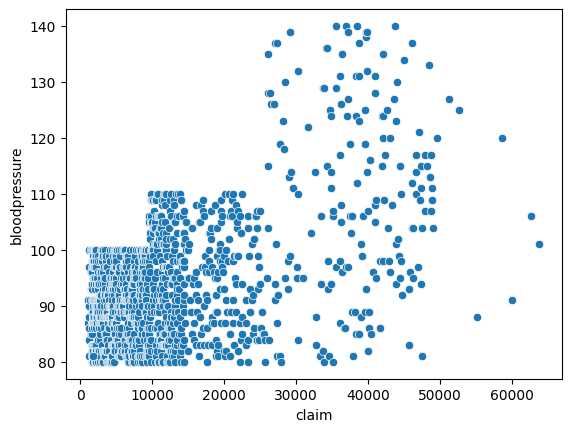

In [6]:
sns.scatterplot(x=df['claim'], y=df['bloodpressure'])

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 3)
kmeans.fit(df)
kmeans.labels_

df['cluster'] = kmeans.labels_
df

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim,cluster
0,39,True,23.2,91,True,0,False,1121.87,2
1,24,True,30.1,87,False,0,False,1131.51,2
2,19,True,41.1,100,False,0,False,1146.80,2
3,20,True,43.0,86,False,0,False,1149.40,2
4,30,True,53.1,97,False,0,False,1163.46,2
...,...,...,...,...,...,...,...,...,...
1327,44,False,35.5,88,True,0,True,55135.40,1
1328,59,False,38.1,120,False,1,True,58571.07,1
1329,30,True,34.5,91,True,3,True,60021.40,1
1330,37,True,30.4,106,False,0,True,62592.87,1


<Axes: xlabel='age', ylabel='claim'>

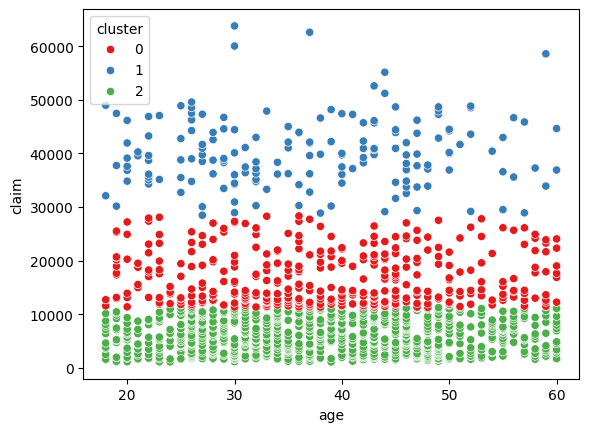

In [19]:
sns.scatterplot(x=df['age'], y=df['claim'], hue = df['cluster'], palette='Set1')

<Axes: xlabel='bmi', ylabel='claim'>

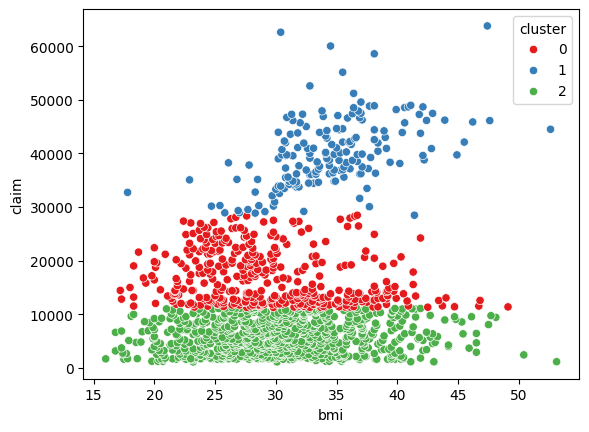

In [20]:
sns.scatterplot(x=df['bmi'], y=df['claim'], hue = df['cluster'], palette='Set1')

<Axes: xlabel='claim', ylabel='bloodpressure'>

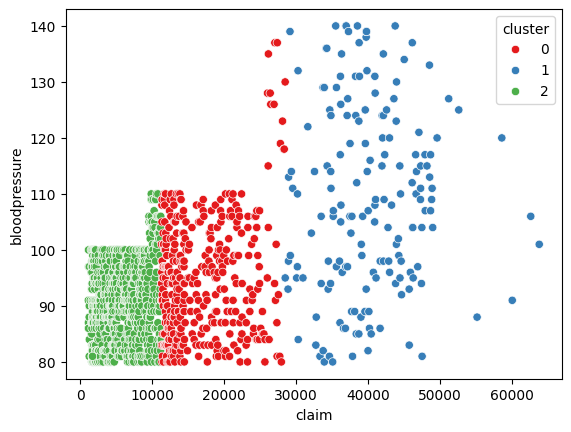

In [21]:
sns.scatterplot(x=df['claim'], y=df['bloodpressure'], hue = df['cluster'], palette='Set1')

<Axes: xlabel='bmi', ylabel='bloodpressure'>

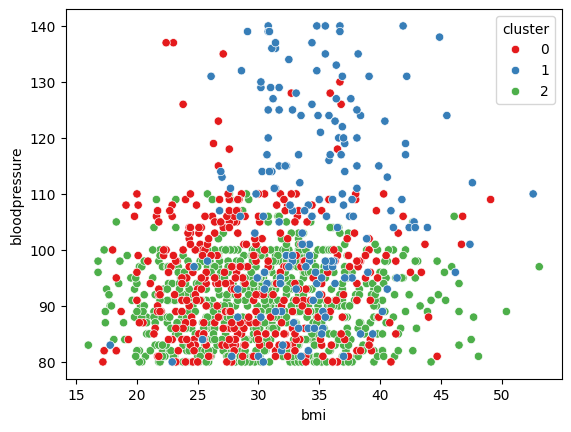

In [22]:
sns.scatterplot(x=df['bmi'], y=df['bloodpressure'], hue = df['cluster'], palette='Set1')

In [23]:
df.head()

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim,cluster
0,39,True,23.2,91,True,0,False,1121.87,2
1,24,True,30.1,87,False,0,False,1131.51,2
2,19,True,41.1,100,False,0,False,1146.80,2
3,20,True,43.0,86,False,0,False,1149.40,2
4,30,True,53.1,97,False,0,False,1163.46,2


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
saude = pca.fit_transform(df[['bmi','bloodpressure','smoker']])
saude

array([[-3.96894166],
       [-7.20996861],
       [ 6.8874452 ],
       ...,
       [-2.74944609],
       [11.72625269],
       [ 8.56798735]])

In [25]:
demog = pca.fit_transform(df[['age','is_male','children']])
demog


array([[  0.90786693],
       [-14.08971132],
       [-19.08890407],
       ...,
       [ -8.0993153 ],
       [ -1.09181017],
       [ -8.07294338]])

In [26]:
df_novo = pd.DataFrame(df['claim'])
df_novo['saude'] = saude
df_novo['demog'] = demog
df_novo

,claim,saude,demog
0,1121.87,-3.968942,0.907867
1,1131.51,-7.209969,-14.089711
2,1146.80,6.887445,-19.088904
3,1149.40,-6.828646,-18.089066
4,1163.46,5.184418,-8.090680
...,...,...,...
1327,55135.40,-5.625393,5.924796
1328,58571.07,26.465982,20.919496
1329,60021.40,-2.749446,-8.099315
1330,62592.87,11.726253,-1.091810


In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 3)
kmeans.fit(df_novo)
kmeans.labels_

df_novo['cluster'] = kmeans.labels_
df_novo

,claim,saude,demog,cluster
0,1121.87,-3.968942,0.907867,2
1,1131.51,-7.209969,-14.089711,2
2,1146.80,6.887445,-19.088904,2
3,1149.40,-6.828646,-18.089066,2
4,1163.46,5.184418,-8.090680,2
...,...,...,...,...
1327,55135.40,-5.625393,5.924796,1
1328,58571.07,26.465982,20.919496,1
1329,60021.40,-2.749446,-8.099315,1
1330,62592.87,11.726253,-1.091810,1


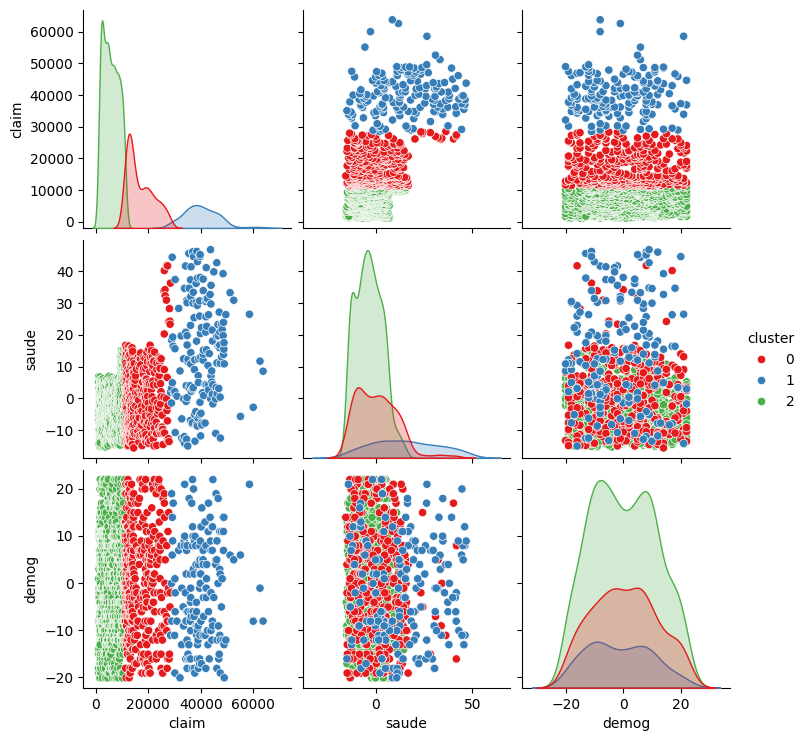

In [31]:
sns.pairplot(df_novo, hue = 'cluster', palette='Set1')